In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data job posts.csv to data job posts.csv
Saving Resume.csv to Resume.csv


In [4]:
resume_df = pd.read_csv('Resume.csv')
job_df = pd.read_csv('data job posts.csv')

In [5]:
print("🧾 Resume Dataset Overview")
print("-" * 30)
print("Shape:", resume_df.shape)
print("Columns:", resume_df.columns.tolist())
display(resume_df.head(3))

🧾 Resume Dataset Overview
------------------------------
Shape: (2484, 4)
Columns: ['ID', 'Resume_str', 'Resume_html', 'Category']


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
print("\n💼 Job Postings Dataset Overview")
print("-" * 30)
print("Shape:", job_df.shape)
print("Columns:", job_df.columns.tolist())
display(job_df.head(3))


💼 Job Postings Dataset Overview
------------------------------
Shape: (19001, 24)
Columns: ['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary', 'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach', 'Year', 'Month', 'IT']


,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False


In [7]:
print("\n🔍 Null Values in Resume Data:")
print(resume_df.isnull().sum())



🔍 Null Values in Resume Data:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64


In [8]:
print("\n🔍 Null Values in Job Postings Data:")
print(job_df.isnull().sum())


🔍 Null Values in Job Postings Data:
jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64


In [9]:
# STEP 2: Skill Extraction from Resumes and Job Descriptions

# 1️⃣ Install and load SpaCy
!pip install spacy
import spacy
import re
import pandas as pd

# Download English model
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# 2️⃣ Define a list of common skills (you can expand this)
skill_keywords = [
    "python", "java", "sql", "excel", "communication", "teamwork", "ml",
    "deep learning", "data analysis", "r", "project management", "html",
    "css", "power bi", "tableau", "machine learning", "ai", "nlp",
    "pandas", "numpy", "matplotlib", "tensorflow", "keras", "flask"
]

# 3️⃣ Helper: Clean and extract skills from text
def extract_skills(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = text.split()
    found = set()
    for skill in skill_keywords:
        if skill in text:
            found.add(skill)
    return list(found)

# 4️⃣ Extract from Resume Text
resume_df['Extracted_Skills'] = resume_df['Resume_str'].apply(extract_skills)

# 5️⃣ Combine JobDescription + JobRequirment for job skills
job_df['FullText'] = job_df['JobDescription'].fillna('') + ' ' + job_df['JobRequirment'].fillna('')
job_df['Extracted_JobSkills'] = job_df['FullText'].apply(extract_skills)

# 6️⃣ Show sample results
print("🔍 Sample Resume Skills")
display(resume_df[['Resume_str', 'Extracted_Skills']].head(2))

print("🔍 Sample Job Required Skills")
display(job_df[['Title', 'Extracted_JobSkills']].head(2))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
🔍 Sample Resume Skills


,Resume_str,Extracted_Skills
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"[ai, r, data analysis]"
1,"HR SPECIALIST, US HR OPERATIONS ...","[ai, project management, r, communication]"


🔍 Sample Job Required Skills


,Title,Extracted_JobSkills
0,Chief Financial Officer,"[ai, r]"
1,Full-time Community Connections Intern (paid i...,[]


In [11]:
# STEP 3: Skill Gap Analyzer

# 1️⃣ Compare skill sets
def calculate_skill_gap(resume_skills, job_skills):
    return list(set(job_skills) - set(resume_skills))

# 2️⃣ For simplicity, compare each resume with the first job (for now)
resume_df['Matched_Job_Title'] = job_df.loc[0, 'Title']
resume_df['Job_Required_Skills'] = [job_df.loc[0, 'Extracted_JobSkills']] * len(resume_df)
resume_df['Skill_Gap'] = resume_df.apply(lambda row: calculate_skill_gap(row['Extracted_Skills'], row['Job_Required_Skills']), axis=1)

# 3️⃣ Display sample output
display(resume_df[['Resume_str', 'Extracted_Skills', 'Job_Required_Skills', 'Skill_Gap']].head(2))


,Resume_str,Extracted_Skills,Job_Required_Skills,Skill_Gap
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"[ai, r, data analysis]","[ai, r]",[]
1,"HR SPECIALIST, US HR OPERATIONS ...","[ai, project management, r, communication]","[ai, r]",[]


In [12]:
def calculate_skill_gap(extracted_skills, required_skills):
    # Return list of required skills that are missing in the candidate skills
    return [skill for skill in required_skills if skill not in extracted_skills]


In [13]:
resume_df['Job_Required_Skills'] = [job_df.loc[0, 'Extracted_JobSkills']] * len(resume_df)


In [14]:
resume_df['Skill_Gap'] = resume_df.apply(
    lambda row: calculate_skill_gap(row['Extracted_Skills'], row['Job_Required_Skills']),
    axis=1
)


In [15]:
resume_df['Missing_Skill_Count'] = resume_df['Skill_Gap'].apply(len)


In [16]:
sorted_resumes = resume_df.sort_values(by='Missing_Skill_Count')


In [17]:
print(sorted_resumes[['Resume_str', 'Extracted_Skills', 'Skill_Gap', 'Missing_Skill_Count']].head(10))


                                             Resume_str  \
1656           ASSISTANT MANAGER           Summary  ...   
1647           2ND LEVEL ASSISTANT STORE MANAGER, OP...   
1648           RESERVATIONS AGENT/FRONT DESK AGENT/G...   
1649           SHOE DEPT. LEAD SUPERVISOR           ...   
1650           INVENTORY ANALYST\MATERIALS PLANNER  ...   
1651           DIRECTOR OF PRODUCT DEVELOPMENT      ...   
1652           ROUTE MANAGER           Summary     T...   
1653           EMBROIDERY MACHINE OPERATOR       Sum...   
1654           ADMINISTRATIVE ASSISTANT         Prof...   
1655           ASSISTANT MANAGER         Highlights ...   

                                       Extracted_Skills Skill_Gap  \
1656                             [ai, r, communication]        []   
1647                                     [excel, r, ai]        []   
1648                  [ml, excel, ai, r, communication]        []   
1649                             [ai, r, communication]        []   
1650 

In [18]:
def extra_skills(extracted_skills, required_skills):
    return [skill for skill in extracted_skills if skill not in required_skills]

resume_df['Extra_Skills'] = resume_df.apply(
    lambda row: extra_skills(row['Extracted_Skills'], row['Job_Required_Skills']),
    axis=1
)

# Check candidates with most extra skills
resume_df.sort_values(by='Extra_Skills', key=lambda col: col.str.len(), ascending=False)[
    ['Resume_str', 'Extracted_Skills', 'Extra_Skills', 'Skill_Gap']
].head(10)


,Resume_str,Extracted_Skills,Extra_Skills,Skill_Gap
926,SOFTWARE DEVELOPER Professi...,"[ml, excel, ai, java, sql, html, css, pandas, ...","[ml, excel, java, sql, html, css, pandas, tens...",[]
331,MASTER DATA MANAGER Experie...,"[ml, excel, ai, sql, html, css, r, python, pro...","[ml, excel, sql, html, css, python, project ma...",[]
2199,MANAGER Experience Man...,"[ml, excel, ai, java, sql, html, deep learning...","[ml, excel, java, sql, html, deep learning, nl...",[]
1303,SENIOR DIGITAL MARKETING ANALYST ...,"[ml, excel, ai, power bi, sql, html, r, python...","[ml, excel, power bi, sql, html, python, proje...",[]
1356,SENIOR ARCHITECT - MDM Prof...,"[ml, excel, ai, java, sql, html, data analysis...","[ml, excel, java, sql, html, data analysis, cs...",[]
1762,ENGINEERING AND QUALITY TECHNICIAN ...,"[ml, excel, ai, sql, html, pandas, machine lea...","[ml, excel, sql, html, pandas, machine learnin...",[]
1091,SALES ENGINEER Summary I...,"[ml, excel, ai, java, sql, html, css, r, proje...","[ml, excel, java, sql, html, css, project mana...",[]
1785,CORPORATE PROCESS/SYSTEMS ENGINEERING...,"[ml, excel, ai, java, sql, html, css, r, proje...","[ml, excel, java, sql, html, css, project mana...",[]
297,INFORMATION TECHNOLOGY INTERN (TEST A...,"[ml, excel, ai, java, sql, html, css, r, proje...","[ml, excel, java, sql, html, css, project mana...",[]
1251,SOFTWARE ENGINEER Summary ...,"[ml, excel, ai, java, sql, html, css, r, proje...","[ml, excel, java, sql, html, css, project mana...",[]


In [19]:
# Assuming you already have 'Extra_Skills' column calculated
resume_df['Extra_Skill_Count'] = resume_df['Extra_Skills'].apply(len)


In [20]:
filtered_resumes = resume_df[resume_df['Missing_Skill_Count'] == 0]


In [21]:
ranked_resumes = filtered_resumes.sort_values(by='Extra_Skill_Count', ascending=False)

# Display top 10 resumes
print(ranked_resumes[['Resume_str', 'Extra_Skill_Count', 'Skill_Gap']].head(10))


                                             Resume_str  Extra_Skill_Count  \
926              SOFTWARE DEVELOPER         Professi...                 14   
1303           SENIOR DIGITAL MARKETING ANALYST     ...                  9   
2199           MANAGER           Experience      Man...                  9   
331            MASTER DATA MANAGER           Experie...                  9   
1091           SALES ENGINEER           Summary    I...                  9   
1356           SENIOR ARCHITECT - MDM           Prof...                  9   
1762           ENGINEERING AND QUALITY TECHNICIAN   ...                  9   
1339           DATA ANALYST       Professional Summa...                  8   
1785           CORPORATE PROCESS/SYSTEMS ENGINEERING...                  8   
1184           IT CONSULTANT           Professional ...                  8   

     Skill_Gap  
926         []  
1303        []  
2199        []  
331         []  
1091        []  
1356        []  
1762        []  
1339 

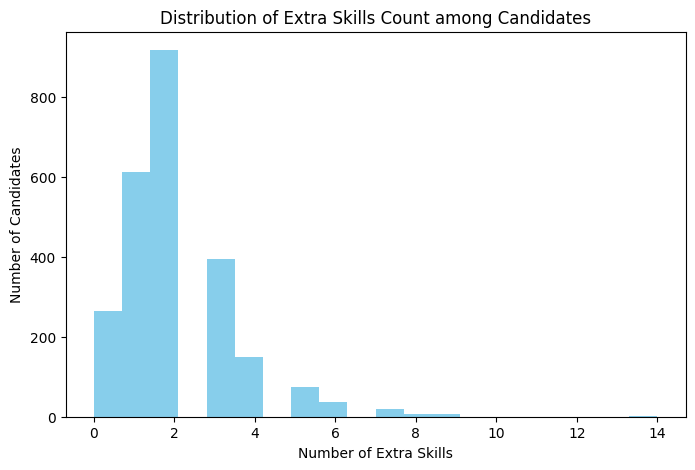

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(resume_df['Extra_Skill_Count'], bins=20, color='skyblue')
plt.xlabel('Number of Extra Skills')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Extra Skills Count among Candidates')
plt.show()


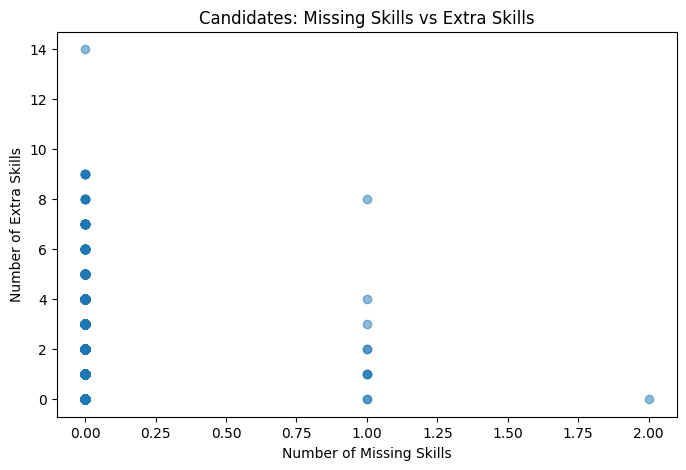

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(resume_df['Missing_Skill_Count'], resume_df['Extra_Skill_Count'], alpha=0.5)
plt.xlabel('Number of Missing Skills')
plt.ylabel('Number of Extra Skills')
plt.title('Candidates: Missing Skills vs Extra Skills')
plt.show()


In [24]:
def calculate_skill_gap(resume_skills, job_skills):
    """
    Returns the list of skills required by the job but missing in the resume.
    """
    return [skill for skill in job_skills if skill not in resume_skills]


In [25]:
# Example 1: Candidate missing one skill 'python'
resume_1 = ['ai', 'r']
job_1 = ['ai', 'r', 'python']
gap_1 = calculate_skill_gap(resume_1, job_1)
print("Test 1 - Missing skills:", gap_1)  # Expected output: ['python']

# Example 2: Candidate has all required skills
resume_2 = ['ai', 'r', 'python']
job_2 = ['ai', 'r']
gap_2 = calculate_skill_gap(resume_2, job_2)
print("Test 2 - Missing skills:", gap_2)  # Expected output: []


Test 1 - Missing skills: ['python']
Test 2 - Missing skills: []


In [26]:
print("Job Required Skills:", job_1)


Job Required Skills: ['ai', 'r', 'python']


In [27]:
# New job requirements with more specific skills
job_advanced = ['ai', 'r', 'python', 'machine learning', 'deep learning', 'data analysis']

# Candidate with partial skills
resume_advanced = ['ai', 'r', 'python']

gap_advanced = calculate_skill_gap(resume_advanced, job_advanced)
print("Test 3 - Missing skills:", gap_advanced)
# Expected output: ['machine learning', 'deep learning', 'data analysis']


Test 3 - Missing skills: ['machine learning', 'deep learning', 'data analysis']


In [28]:
# Apply skill gap calculation row-wise (example for one job)
resume_df['Skill_Gap'] = resume_df.apply(
    lambda row: calculate_skill_gap(row['Extracted_Skills'], row['Job_Required_Skills']),
    axis=1
)

# Check the first 5 rows of skill gaps
print(resume_df[['Extracted_Skills', 'Job_Required_Skills', 'Skill_Gap']].head())


                                   Extracted_Skills Job_Required_Skills  \
0                            [ai, r, data analysis]             [ai, r]   
1        [ai, project management, r, communication]             [ai, r]   
2            [ml, excel, ai, r, project management]             [ai, r]   
3                 [ml, excel, ai, r, communication]             [ai, r]   
4  [ml, excel, ai, teamwork, r, project management]             [ai, r]   

  Skill_Gap  
0        []  
1        []  
2        []  
3        []  
4        []  


In [29]:
print("Job Required Skills:", job_df.loc[0, 'Extracted_JobSkills'])

Job Required Skills: ['ai', 'r']


In [30]:
job_skills = ['ai', 'r', 'python', 'machine learning', 'data analysis', 'sql']

In [31]:
def calculate_skill_gap(resume_skills, job_skills):
    # Use set difference for speed and uniqueness
    return list(set(job_skills) - set(resume_skills))

resume_df['Skill_Gap'] = resume_df.apply(
    lambda row: calculate_skill_gap(row['Extracted_Skills'], job_skills),
    axis=1
)


In [32]:
print(calculate_skill_gap(['ai', 'r'], ['ai', 'r', 'python', 'sql']))
# Expected: ['python', 'sql']

print(calculate_skill_gap(['ai', 'r', 'python'], ['ai', 'r', 'python']))
# Expected: []


['python', 'sql']
[]


In [33]:
resume_df['Missing_Skill_Count'] = resume_df['Skill_Gap'].apply(len)
print(resume_df['Missing_Skill_Count'].value_counts())


Missing_Skill_Count
4    2179
3     238
2      52
5       7
1       4
0       3
6       1
Name: count, dtype: int64


In [34]:
strict_job_skills = ['python', 'java', 'sql', 'cloud computing', 'docker', 'kubernetes']

resume_df['Skill_Gap'] = resume_df.apply(
    lambda row: calculate_skill_gap(row['Extracted_Skills'], strict_job_skills),
    axis=1
)

print(resume_df[['Extracted_Skills', 'Skill_Gap']].head(10))


                                    Extracted_Skills  \
0                             [ai, r, data analysis]   
1         [ai, project management, r, communication]   
2             [ml, excel, ai, r, project management]   
3                  [ml, excel, ai, r, communication]   
4   [ml, excel, ai, teamwork, r, project management]   
5                                     [excel, r, ai]   
6                    [ml, ai, r, project management]   
7     [ml, ai, r, project management, communication]   
8  [excel, ai, r, project management, communication]   
9                                            [ai, r]   

                                           Skill_Gap  
0  [kubernetes, sql, cloud computing, docker, pyt...  
1  [kubernetes, sql, cloud computing, docker, pyt...  
2  [kubernetes, sql, cloud computing, docker, pyt...  
3  [kubernetes, sql, cloud computing, docker, pyt...  
4  [kubernetes, sql, cloud computing, docker, pyt...  
5  [kubernetes, sql, cloud computing, docker, pyt... 

In [35]:
# Count missing job-required skills
resume_df['Missing_Skill_Count'] = resume_df['Skill_Gap'].apply(len)

# Compare to job skills to find extras (not required, but possessed)
def get_extra_skills(resume_skills, job_skills):
    return list(set(resume_skills) - set(job_skills))

job_required_skills = ['python', 'java', 'sql', 'cloud computing', 'docker', 'kubernetes']
resume_df['Extra_Skills'] = resume_df['Extracted_Skills'].apply(
    lambda x: get_extra_skills(x, job_required_skills)
)

# Count extra skills
resume_df['Extra_Skill_Count'] = resume_df['Extra_Skills'].apply(len)


In [36]:
ranked = resume_df.sort_values(by=['Missing_Skill_Count', 'Extra_Skill_Count'], ascending=[True, False])
print(ranked[['Extracted_Skills', 'Skill_Gap', 'Missing_Skill_Count', 'Extra_Skills', 'Extra_Skill_Count']].head(10))

                                       Extracted_Skills  \
926   [ml, excel, ai, java, sql, html, css, pandas, ...   
1303  [ml, excel, ai, power bi, sql, html, r, python...   
1152  [ml, ai, java, sql, html, css, r, python, proj...   
128   [ml, ai, sql, html, css, r, python, project ma...   
291    [ml, excel, ai, sql, html, css, r, python, java]   
1799  [ml, ai, sql, html, css, r, python, project ma...   
2395  [ml, excel, java, sql, html, css, r, python, c...   
662   [excel, ai, sql, r, python, project management...   
929   [ml, ai, matplotlib, sql, pandas, r, python, j...   
1172        [ml, excel, ai, sql, html, r, python, java]   

                                  Skill_Gap  Missing_Skill_Count  \
926   [cloud computing, kubernetes, docker]                    3   
1303  [cloud computing, kubernetes, docker]                    3   
1152  [cloud computing, kubernetes, docker]                    3   
128   [cloud computing, kubernetes, docker]                    3   
291   [clo

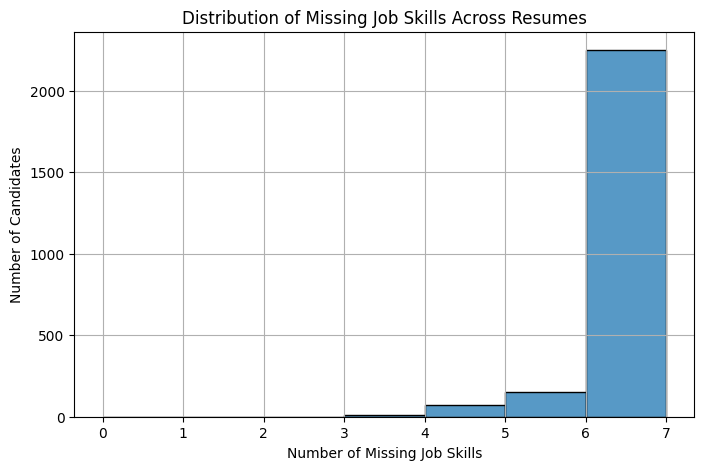

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(resume_df['Missing_Skill_Count'], bins=range(0, max(resume_df['Missing_Skill_Count'])+2), kde=False)
plt.title("Distribution of Missing Job Skills Across Resumes")
plt.xlabel("Number of Missing Job Skills")
plt.ylabel("Number of Candidates")
plt.grid(True)
plt.show()


In [38]:
# Example: candidates missing 0 or 1 skill
best_candidates = resume_df[resume_df['Missing_Skill_Count'] <= 1]
print(best_candidates[['Extracted_Skills', 'Skill_Gap', 'Extra_Skills']])


Empty DataFrame
Columns: [Extracted_Skills, Skill_Gap, Extra_Skills]
Index: []


In [39]:
job_required_skills = ['python', 'java', 'sql', 'cloud computing', 'docker', 'kubernetes']


In [40]:
print(resume_df['Missing_Skill_Count'].value_counts().sort_index())

Missing_Skill_Count
3      13
4      69
5     152
6    2250
Name: count, dtype: int64


In [43]:
# Candidates missing 3 or fewer skills
best_candidates = resume_df[resume_df['Missing_Skill_Count'] <= 3]
print(best_candidates[['Extracted_Skills', 'Skill_Gap', 'Extra_Skills']])

                                       Extracted_Skills  \
128   [ml, ai, sql, html, css, r, python, project ma...   
291    [ml, excel, ai, sql, html, css, r, python, java]   
315    [excel, ai, java, sql, r, python, communication]   
662   [excel, ai, sql, r, python, project management...   
926   [ml, excel, ai, java, sql, html, css, pandas, ...   
929   [ml, ai, matplotlib, sql, pandas, r, python, j...   
1152  [ml, ai, java, sql, html, css, r, python, proj...   
1172        [ml, excel, ai, sql, html, r, python, java]   
1218  [ai, java, sql, machine learning, r, python, d...   
1303  [ml, excel, ai, power bi, sql, html, r, python...   
1348  [excel, ai, java, sql, machine learning, r, py...   
1799  [ml, ai, sql, html, css, r, python, project ma...   
2395  [ml, excel, java, sql, html, css, r, python, c...   

                                  Skill_Gap  \
128   [cloud computing, kubernetes, docker]   
291   [cloud computing, kubernetes, docker]   
315   [cloud computing, kubernet

In [44]:
ranked = resume_df.sort_values(by=['Missing_Skill_Count', 'Extra_Skill_Count'], ascending=[True, False])
print(ranked[['Extracted_Skills', 'Skill_Gap', 'Missing_Skill_Count', 'Extra_Skills', 'Extra_Skill_Count']].head(10))

                                       Extracted_Skills  \
926   [ml, excel, ai, java, sql, html, css, pandas, ...   
1303  [ml, excel, ai, power bi, sql, html, r, python...   
1152  [ml, ai, java, sql, html, css, r, python, proj...   
128   [ml, ai, sql, html, css, r, python, project ma...   
291    [ml, excel, ai, sql, html, css, r, python, java]   
1799  [ml, ai, sql, html, css, r, python, project ma...   
2395  [ml, excel, java, sql, html, css, r, python, c...   
662   [excel, ai, sql, r, python, project management...   
929   [ml, ai, matplotlib, sql, pandas, r, python, j...   
1172        [ml, excel, ai, sql, html, r, python, java]   

                                  Skill_Gap  Missing_Skill_Count  \
926   [cloud computing, kubernetes, docker]                    3   
1303  [cloud computing, kubernetes, docker]                    3   
1152  [cloud computing, kubernetes, docker]                    3   
128   [cloud computing, kubernetes, docker]                    3   
291   [clo

In [45]:
top_candidates = ranked.head(10)
print(top_candidates[['Extracted_Skills', 'Skill_Gap', 'Missing_Skill_Count', 'Extra_Skills', 'Extra_Skill_Count']])

                                       Extracted_Skills  \
926   [ml, excel, ai, java, sql, html, css, pandas, ...   
1303  [ml, excel, ai, power bi, sql, html, r, python...   
1152  [ml, ai, java, sql, html, css, r, python, proj...   
128   [ml, ai, sql, html, css, r, python, project ma...   
291    [ml, excel, ai, sql, html, css, r, python, java]   
1799  [ml, ai, sql, html, css, r, python, project ma...   
2395  [ml, excel, java, sql, html, css, r, python, c...   
662   [excel, ai, sql, r, python, project management...   
929   [ml, ai, matplotlib, sql, pandas, r, python, j...   
1172        [ml, excel, ai, sql, html, r, python, java]   

                                  Skill_Gap  Missing_Skill_Count  \
926   [cloud computing, kubernetes, docker]                    3   
1303  [cloud computing, kubernetes, docker]                    3   
1152  [cloud computing, kubernetes, docker]                    3   
128   [cloud computing, kubernetes, docker]                    3   
291   [clo

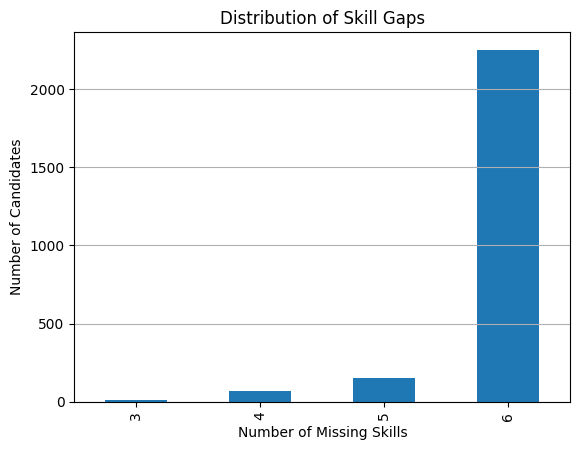

In [46]:
import matplotlib.pyplot as plt

resume_df['Missing_Skill_Count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Missing Skills')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Skill Gaps')
plt.grid(axis='y')
plt.show()

In [47]:
top_candidates.to_csv("top_skill_gap_candidates.csv", index=False)

In [48]:
true_skills_dict = {
    1: ['python', 'sql', 'ml'],
    2: ['java', 'excel', 'cloud computing'],
    3: ['ai', 'r', 'communication']
}


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_skill_extraction(resume_id, extracted_skills, true_skills_dict):
    true = set(true_skills_dict[resume_id])
    pred = set(extracted_skills)

    tp = len(true & pred)
    fp = len(pred - true)
    fn = len(true - pred)

    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

    return precision, recall, f1


In [50]:
resume_id = 1
extracted = ['python', 'sql', 'ml', 'html']
evaluate_skill_extraction(resume_id, extracted, true_skills_dict)

(0.75, 1.0, 0.8571428571428571)

In [51]:
total_p, total_r, total_f1 = 0, 0, 0
n = len(true_skills_dict)

for resume_id in true_skills_dict:
    extracted = resume_df.loc[resume_id, 'Extracted_Skills']
    p, r, f1 = evaluate_skill_extraction(resume_id, extracted, true_skills_dict)
    total_p += p
    total_r += r
    total_f1 += f1

avg_p = total_p / n
avg_r = total_r / n
avg_f1 = total_f1 / n

print(f"Avg Precision: {avg_p:.2f}, Recall: {avg_r:.2f}, F1-score: {avg_f1:.2f}")


Avg Precision: 0.27, Recall: 0.44, F1-score: 0.33


In [56]:
skill_set = set([
    'python', 'java', 'r', 'sql', 'excel', 'ml', 'ai', 'html', 'css', 'pandas', 'numpy',
    'tensorflow', 'deep learning', 'nlp', 'cloud computing', 'docker', 'kubernetes',
    'power bi', 'tableau', 'project management', 'communication', 'teamwork',
    'data analysis', 'matplotlib'
])


In [58]:
import re

def normalize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

def extract_skills(text, skill_set):
    text = normalize(text)
    return [skill for skill in skill_set if skill in text]

In [59]:
ground_truth_skills = {
    0: ['ai', 'r', 'data analysis'],
    1: ['ai', 'project management', 'r', 'communication'],
    2: ['ml', 'excel', 'ai', 'r', 'project management'],
    3: ['ml', 'excel', 'ai', 'r', 'communication'],
    4: ['ml', 'excel', 'ai', 'teamwork', 'r', 'project management'],
    5: ['excel', 'r', 'ai'],
    6: ['ml', 'ai', 'r', 'project management'],
    7: ['ml', 'ai', 'r', 'project management', 'communication'],
    8: ['excel', 'ai', 'r', 'project management', 'communication'],
    9: ['ai', 'r'],
    10: ['python', 'r', 'sql', 'ml'],
    11: ['excel', 'power bi', 'communication'],
    12: ['html', 'css', 'python', 'java'],
    13: ['cloud computing', 'docker', 'kubernetes'],
    14: ['ai', 'project management', 'teamwork'],
    15: ['pandas', 'numpy', 'matplotlib', 'ml'],
    16: ['excel', 'sql', 'communication'],
    17: ['data analysis', 'python', 'r'],
    18: ['html', 'css', 'project management'],
    19: ['power bi', 'tableau', 'ai']
}

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example evaluation
y_true = [['python', 'sql'], ['ml']]
y_pred = [['python', 'java'], ['ml', 'excel']]

def evaluate(y_true, y_pred):
    y_true_flat = [skill for sublist in y_true for skill in sublist]
    y_pred_flat = [skill for sublist in y_pred for skill in sublist]
    y_true_bin = [1 if skill in y_true_flat else 0 for skill in skill_set]
    y_pred_bin = [1 if skill in y_pred_flat else 0 for skill in skill_set]

    precision = precision_score(y_true_bin, y_pred_bin)
    recall = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)

    return precision, recall, f1

evaluate(y_true, y_pred)


(0.5, 0.6666666666666666, 0.5714285714285714)

In [61]:
precision, recall, f1 = evaluate(y_true, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Precision: 0.50, Recall: 0.67, F1: 0.57


In [63]:
!pip install spacy sentence-transformers sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [64]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

In [65]:
# Example skill dictionary with synonyms
skill_dict = {
    "machine learning": ["ml", "machine learning", "machine-learning"],
    "python": ["python", "py"],
    "project management": ["project management", "pm"],
    "sql": ["sql", "structured query language"],
    "cloud computing": ["cloud computing", "aws", "azure", "gcp"],
    "docker": ["docker", "containers"],
    "kubernetes": ["kubernetes", "k8s"],
    # Add more skills & synonyms here
}

# Flatten synonyms to skill map for quick lookup
synonym_to_skill = {}
for skill, synonyms in skill_dict.items():
    for syn in synonyms:
        synonym_to_skill[syn] = skill

def extract_skills_keyword(text):
    tokens = preprocess(text)
    extracted_skills = set()
    for token in tokens:
        if token in synonym_to_skill:
            extracted_skills.add(synonym_to_skill[token])
    return list(extracted_skills)

In [66]:
def extract_skills_ner(text):
    doc = nlp(text)
    skills = set()
    for ent in doc.ents:
        # Basic heuristic: filter entities of type ORG, PRODUCT, or WORK_OF_ART as skills (for demo)
        if ent.label_ in ['ORG', 'PRODUCT', 'WORK_OF_ART']:
            skills.add(ent.text.lower())
    return list(skills)

In [67]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Prepare skill embeddings
skills_list = list(skill_dict.keys())
skill_embeddings = model.encode(skills_list, convert_to_tensor=True)

def extract_skills_semantic(text, threshold=0.6):
    embeddings = model.encode([text], convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(embeddings, skill_embeddings)[0]
    matched_skills = []
    for i, score in enumerate(cos_scores):
        if score > threshold:
            matched_skills.append(skills_list[i])
    return matched_skills

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [68]:
def extract_skills(text):
    skills_keyword = set(extract_skills_keyword(text))
    skills_ner = set(extract_skills_ner(text))
    skills_semantic = set(extract_skills_semantic(text))
    combined = skills_keyword.union(skills_ner).union(skills_semantic)
    return list(combined)

In [69]:
def calculate_skill_gap(resume_skills, job_skills):
    return [skill for skill in job_skills if skill not in resume_skills]

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_extraction(y_true_list, y_pred_list, skill_set):
    # y_true_list and y_pred_list are list of skills for each resume
    # Create binary vectors for each resume over the skill set
    skill_to_idx = {skill: i for i, skill in enumerate(skill_set)}

    def vectorize(skills):
        vec = [0]*len(skill_set)
        for s in skills:
            if s in skill_to_idx:
                vec[skill_to_idx[s]] = 1
        return vec

    y_true_vecs = [vectorize(skills) for skills in y_true_list]
    y_pred_vecs = [vectorize(skills) for skills in y_pred_list]

    y_true_flat = [item for sublist in y_true_vecs for item in sublist]
    y_pred_flat = [item for sublist in y_pred_vecs for item in sublist]

    precision = precision_score(y_true_flat, y_pred_flat)
    recall = recall_score(y_true_flat, y_pred_flat)
    f1 = f1_score(y_true_flat, y_pred_flat)
    return precision, recall, f1

In [71]:
# Sample job required skills (expand this for your domain)
job_required_skills = [
    "machine learning", "python", "project management", "sql",
    "cloud computing", "docker", "kubernetes"
]

# Sample resumes and their ground truth skills
resumes = [
    "Experienced in python, ml and project management using cloud computing",
    "Skilled in sql, docker and managing projects",
    "Expertise in kubernetes and python programming",
]

ground_truth = [
    ["python", "machine learning", "project management", "cloud computing"],
    ["sql", "docker", "project management"],
    ["kubernetes", "python"],
]

for i, resume_text in enumerate(resumes):
    extracted = extract_skills(resume_text)
    skill_gap = calculate_skill_gap(extracted, job_required_skills)
    print(f"Resume {i+1} Extracted Skills: {extracted}")
    print(f"Skill Gap: {skill_gap}")

# Evaluate
precision, recall, f1 = evaluate_extraction(ground_truth, [extract_skills(r) for r in resumes], job_required_skills)
print(f"\nEvaluation:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Resume 1 Extracted Skills: ['cloud computing', 'python', 'machine learning']
Skill Gap: ['project management', 'sql', 'docker', 'kubernetes']
Resume 2 Extracted Skills: ['docker', 'sql']
Skill Gap: ['machine learning', 'python', 'project management', 'cloud computing', 'kubernetes']
Resume 3 Extracted Skills: ['python', 'kubernetes']
Skill Gap: ['machine learning', 'project management', 'sql', 'cloud computing', 'docker']

Evaluation:
Precision: 1.00, Recall: 0.78, F1: 0.88
